<a href="https://colab.research.google.com/github/Plutokekz/dec/blob/main/Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [ ]:
from tensorflow.keras import layers, losses
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
def plot(x_test, predicted_test):
  n = 5
  plt.figure(figsize=(10, 4))
  for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("original", color="black")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(predicted_test[i])
    plt.title("reconstructed", color="black")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  plt.show()

Laden des Datensatztes und normalisieren 
(Da es sich um Fotos handelt mit Pixelwerten zwischen 0 und 255 durch 255 teilen um werte zwischen 0 und 1 zubekommen)

In [ ]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

Simpler Autoencoder mit einem Engpass in der Mitte

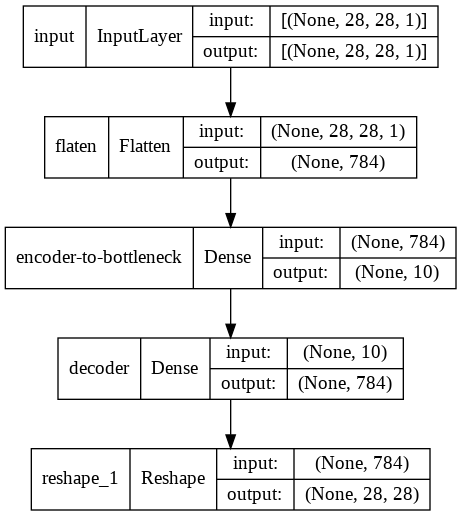

In [ ]:
bottleneck = 10

autoencoder = tf.keras.Sequential([
          layers.Input((28, 28, 1), name="input"),
          layers.Flatten(name="flaten"),
          layers.Dense(bottleneck, activation='relu', name="encoder-to-bottleneck"),
          layers.Dense(784, activation='sigmoid', name="decoder"),
          layers.Reshape((28, 28))])

tf.keras.utils.plot_model(autoencoder, show_shapes=True)

In [ ]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
autoencoder.fit(x_train, x_train, epochs=50, shuffle=True, validation_data=(x_test, x_test))
predicted = autoencoder.predict(x_test)

Epoch 1/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0381 - val_loss: 0.0249
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0231 - val_loss: 0.0222
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0219 - val_loss: 0.0218
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0216 - val_loss: 0.0215
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0215 - val_loss: 0.0214
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0214 - val_loss: 0.0214
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0213 - val_loss: 0.0213
Epoch 8/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0213 - val_loss: 0.0214
Epoch 9/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0212 - val_loss: 0.0212
Epoch 10/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.021

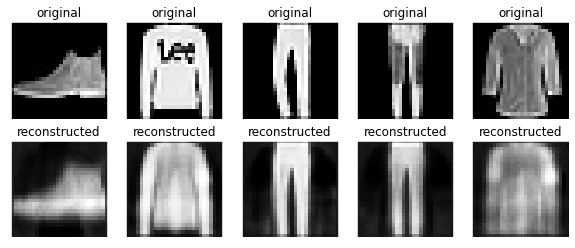

In [ ]:
plot(x_test, predicted)

Denoising Autoencoder
Input Images bekommen random noise während die output Bilder die ohne noise bleiben

In [ ]:
noise_factor = 0.2
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape) 
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape) 

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

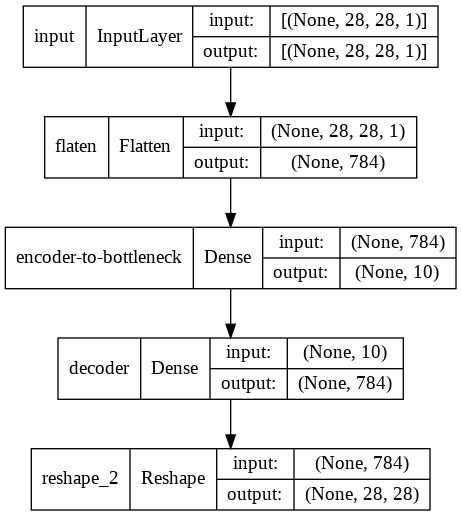

In [ ]:
bottleneck = 10

autoencoder = tf.keras.Sequential([
          layers.Input((28, 28, 1), name="input"),
          layers.Flatten(name="flaten"),
          layers.Dense(bottleneck, activation='relu', name="encoder-to-bottleneck"),
          layers.Dense(784, activation='sigmoid', name="decoder"),
          layers.Reshape((28, 28))])

tf.keras.utils.plot_model(autoencoder, show_shapes=True)

In [ ]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
autoencoder.fit(x_train, x_train_noisy, epochs=50, shuffle=True, validation_data=(x_test_noisy, x_test))
predicted = autoencoder.predict(x_test)

Epoch 1/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0516 - val_loss: 0.0302
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0397 - val_loss: 0.0291
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0392 - val_loss: 0.0284
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0390 - val_loss: 0.0286
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0389 - val_loss: 0.0284
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0388 - val_loss: 0.0284
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0388 - val_loss: 0.0285
Epoch 8/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0387 - val_loss: 0.0276
Epoch 9/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0387 - val_loss: 0.0276
Epoch 10/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.038

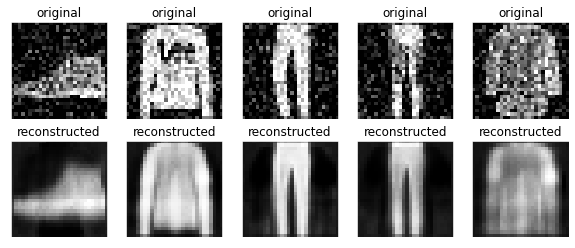

In [ ]:
plot(x_test_noisy, predicted)